In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.utils import shuffle

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0, 
                          n_repeated=0, n_classes=2, n_clusters_per_class=2, class_sep=2,
                          flip_y=0.01, weights=[0.5,0.5], random_state=5)

In [3]:
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

In [5]:
def sigmoid(X, theta):
    z = np.dot(X, theta[1:]) + theta[0]
    
    return 1.0 / ( 1.0 + np.exp(-z))

def cost_function(y, hx):
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    return j

def predict(X, theta):
    return np.where(sigmoid(X,theta) >= 0.5, 1, 0)

In [19]:
def decision_boundry(X, y, theta, classifier, h=0.02):
    # h = step size in the mesh
  
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))
    

    if theta is not None:
        Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T, theta)
    else:
        Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, 
                    #c=cmap(idx),
                    marker=markers[idx], label=cl)

# Gradient Descent

In [ ]:
def gradient(X, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    hist = []
    
    for i in range(num_iter):
        # call sigmoid function 
        hx = sigmoid(X, theta)
        # calculate error
        error = hx - y
        # calculate gradient
        grad = X.T.dot(error)
        # update values in theta
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
        
        hist.append(cost_function(y, hx))
        
    return theta, hist

# Stochastic Gradient Descent

In [10]:
# Gradient Descent function to minimize the Logistic Regression Cost Function.
def sgd(X, y, theta, alpha, num_iter):
    nth = 0
    prev_cost = float("inf")
    cost_threshold = 0.01  # in percent
    
    lossHistory = []    
    for epoch in range(num_iter):
        epochLoss = []

        # shuffle to prevent repeating update cycles
        X, y = shuffle(X, y)
        for ind, x in enumerate(X):
            # call sigmoid function 
            hx = sigmoid(X, theta)
            # calculate error
            error = hx - y
            # calculate gradient
            grad = X.T.dot(error)
            # update values in theta
            theta[0] = theta[0] - alpha * error.sum()
            theta[1:] = theta[1:] - alpha * grad
            
            cost = cost_function(y, hx)
            epochLoss.append(cost)

        lossHistory.append(np.average(epochLoss))

        # convergence check on 2^nth epoch
        if epoch == 2 ** nth:
            # cost = compute_cost(weights, features, outputs, regularization_strength)                        
            print("Epoch is: {} and Cost is: {}".format(epoch, cost))
            
            # criterion for stop
            if abs(prev_cost - cost) < cost_threshold * prev_cost:
                return theta, lossHistory
            
            prev_cost = cost
            nth += 1
        
    return theta, lossHistory        

# Training

In [11]:
# m = Number of training examples
# n = number of features
m, n = X.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.01
num_iter = 1000

theta, hist = sgd(X_std, y, theta, alpha, num_iter)

Epoch is: 1 and Cost is: 5.969387849599734
Epoch is: 2 and Cost is: 5.815136717680523
Epoch is: 4 and Cost is: 5.723946312688835
Epoch is: 8 and Cost is: 5.693217061049515


In [12]:
# print theta paramters 
print ('\n Logisitc Regression bias(intercept) term :', theta[0])
print ('\n Logisitc Regression estimated coefficients :', theta[1:])


 Logisitc Regression bias(intercept) term : 0.7387254176376092

 Logisitc Regression estimated coefficients : [ 6.30911471 -0.99604976]


Text(0.5, 1.0, 'Logistic Regression')

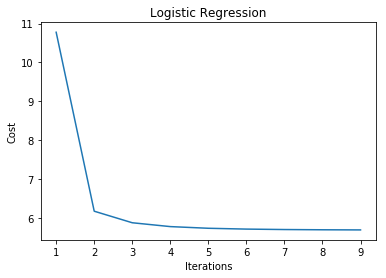

In [13]:
plt.plot(range(1, len(hist) + 1), hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')

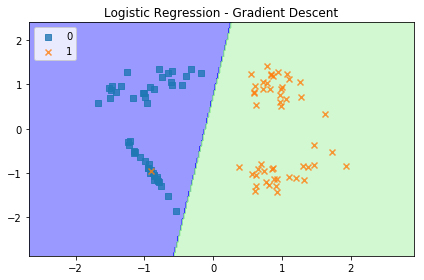

In [14]:
decision_boundry(X_std, y, theta, classifier=predict)
plt.title('Logistic Regression - Gradient Descent')
plt.legend(loc='upper left')
plt.tight_layout()

# Comparing with Scikit-learn

In [18]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(solver='lbfgs')

logreg.fit(X_std, y)

# print theta paramters 
print ('\n sklearn bias(intercept) term :', logreg.intercept_)
print ('\n sklearn estimated coefficients :', logreg.coef_)


 sklearn bias(intercept) term : [0.1707799]

 sklearn estimated coefficients : [[ 3.37254832 -0.27023208]]


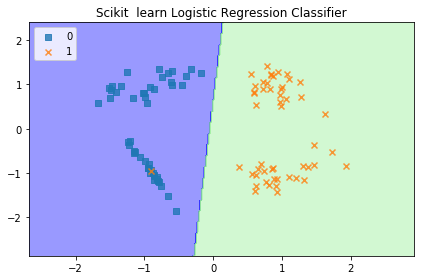

In [20]:
decision_boundry(X_std, y, None, classifier=logreg.predict)
plt.title('Scikit  learn Logistic Regression Classifier')
plt.legend(loc='upper left')
plt.tight_layout()